# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.99122373 2.10975371 2.9717292  2.41072396 2.64692402 2.04164679
 2.20134747 2.86623503 2.67508396 2.49047343]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [24]:
# your code here
def generaterandom(b,c,count):
    x = uniform.rvs(size=count)
    return b+(c-b)*x

params1 =generaterandom(10,15,100)
params2 = generaterandom(10,60,1000)

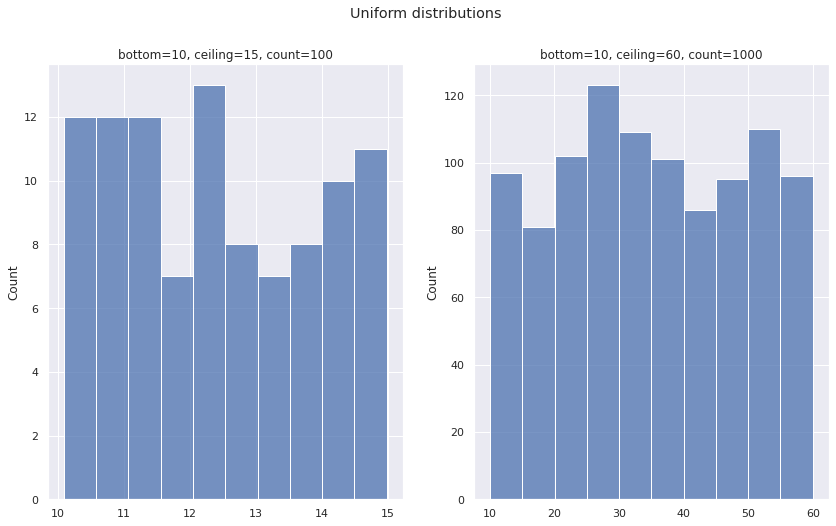

In [39]:

# ax.plot(params1)
sns.set_context('poster')
sns.set(rc={'figure.figsize': (14., 8.)})
sns.set_style('whitegrid')
sns.set()
fig, axs = plt.subplots(1,2)
sns.histplot(params1, ax=axs[0], bins=10)
sns.histplot(params2, ax=axs[1], bins=10)
fig.suptitle('Uniform distributions')
axs[0].set_title('bottom=10, ceiling=15, count=100')
axs[1].set_title('bottom=10, ceiling=60, count=1000');

How are the two distributions different?

In [29]:
# your answer below
#Una va entre 10 y 15 y la otra entre 10 y 60 con diez veces más datos. Pero a nivel distribución las dos son más o menos uniformes

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [36]:
# your code here

from scipy.stats import norm

onenorm = norm(loc=10, scale=1)
othernorm = norm(loc=10, scale=50)

uno = onenorm.rvs(size=1000)
dos = othernorm.rvs(size=1000)

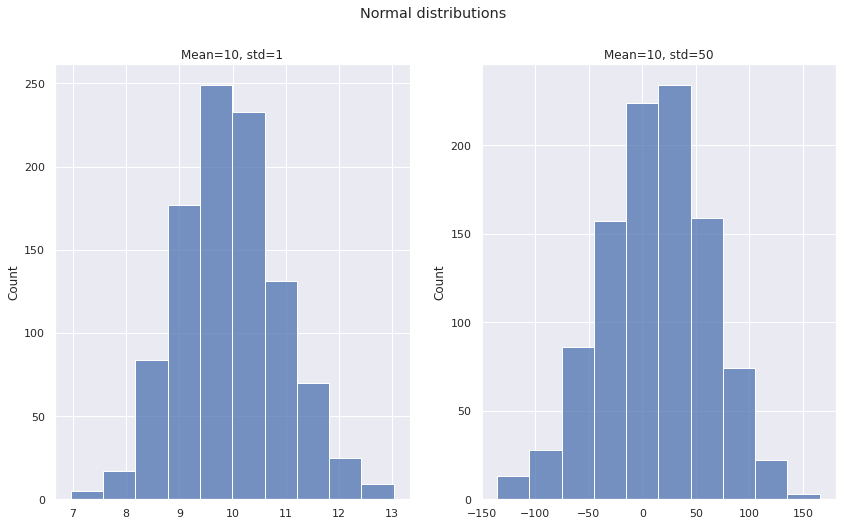

In [40]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (14., 8.)})
sns.set_style('whitegrid')
sns.set()
fig, axs = plt.subplots(1,2)
sns.histplot(uno, ax=axs[0], bins=10)
sns.histplot(dos, ax=axs[1], bins=10)
fig.suptitle('Normal distributions')
axs[0].set_title('Mean=10, std=1')
axs[1].set_title('Mean=10, std=50');

How are the two distributions different?

In [ ]:
# your answer below

Las dos están centradas en el 10, pero la de std=50 tiene un rango mucho más amplio

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [41]:
# your code here
import pandas as pd

vehicles = pd.read_csv('vehicles.csv')

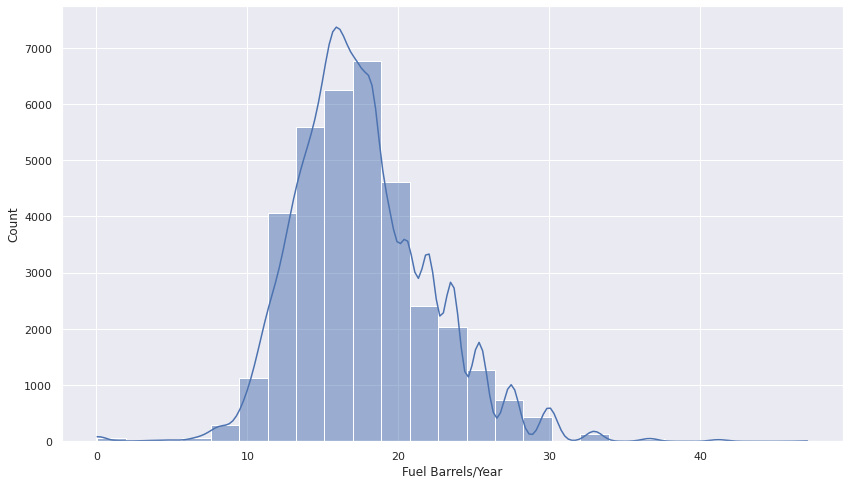

In [55]:
sns.histplot(vehicles['Fuel Barrels/Year'], bins=25, kde=True);

2. CO2 Emission Grams/Mile 

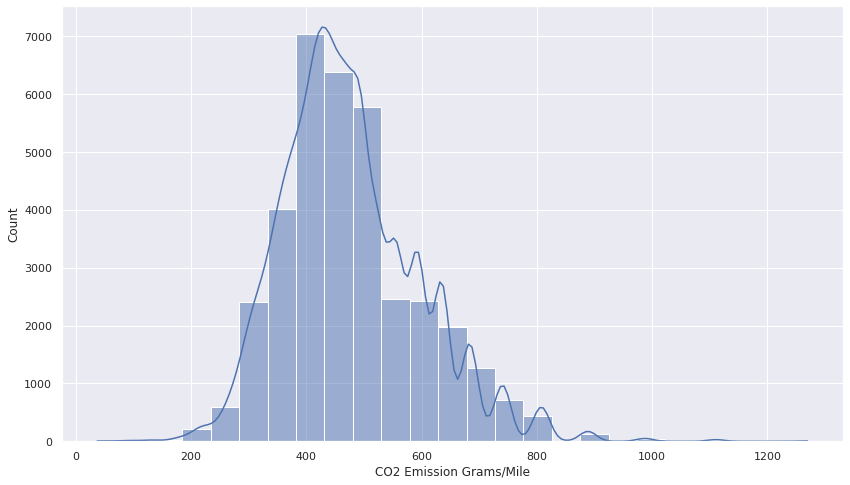

In [54]:
# your code here
sns.histplot(vehicles['CO2 Emission Grams/Mile'],bins=25, kde=True);

3. Combined MPG

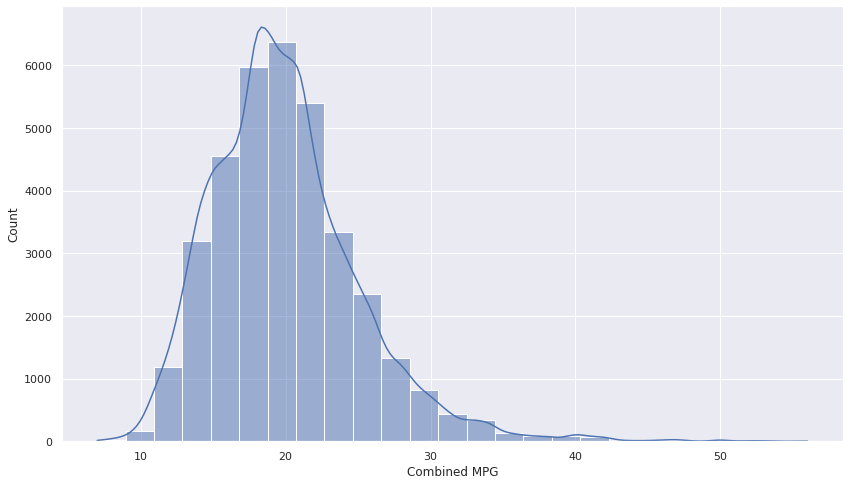

In [56]:
# your code here

sns.histplot(vehicles['Combined MPG'], bins=25, kde=True);

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# your answer here

Combined MPG es practicamente normal, ya que estácentrada en el 20 y es casi simétrica.
Las otras dos no son simétricas

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [63]:
def exponential10(n):
    return np.random.exponential(scale=10, size=n)

In [66]:
# your code here
ten = exponential10(10)
hundred = exponential10(100)


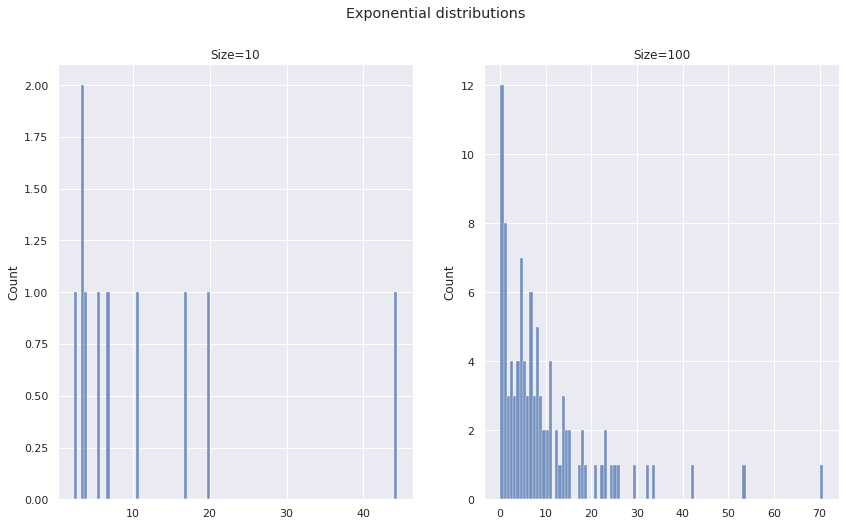

In [67]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (14., 8.)})
sns.set_style('whitegrid')
sns.set()
fig, axs = plt.subplots(1,2)
sns.histplot(ten, ax=axs[0], bins=100)
sns.histplot(hundred, ax=axs[1], bins=100)
fig.suptitle('Exponential distributions')
axs[0].set_title('Size=10')
axs[1].set_title('Size=100');

How are the two distributions different?

In [ ]:
# your answer here
# En la priemra apenas se puede apreciar que es exponencial ya que hay muy pocos datos. 
# Si hiciéramos una con 100000 datos quedaría aún mejor

<AxesSubplot:ylabel='Count'>

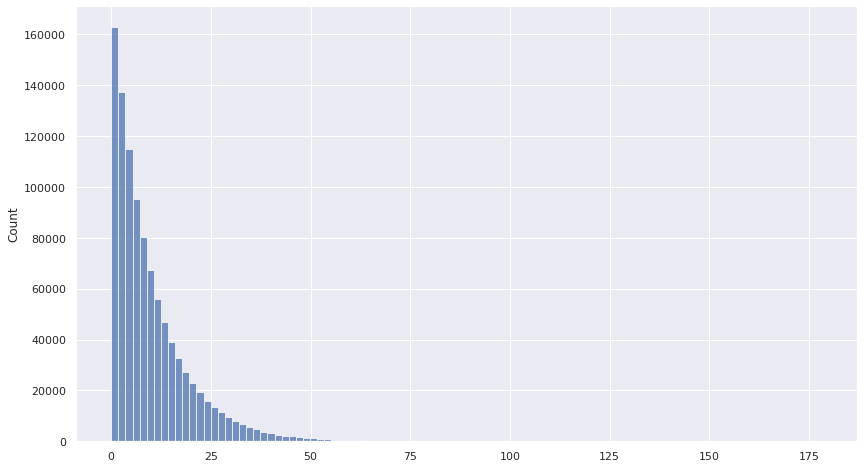

In [79]:
thousand = exponential10(1000000)
sns.histplot(thousand,  bins=100)

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [69]:
# your answer here
# Hint: This is same as saying P(x<15)
from scipy.stats import expon

In [77]:
bank = expon(scale=10)
bank.cdf(15)

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [ ]:
# your answer here

In [78]:
1-bank.cdf(15)

0.2231301601484298